In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import cv2
import random


In [23]:
mother_path = "/Users/inyourdream/Downloads/CIFAR-10-images-master/train"
catagories = []
for catagory in os.listdir(mother_path):
    if catagory != ".DS_Store":
        catagories.append(catagory)

train_data = []
for c in catagories:
    path = os.path.join(mother_path, c)
    class_num = catagories.index(c)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img))
        train_data.append({"image": img_arr, "class": class_num})


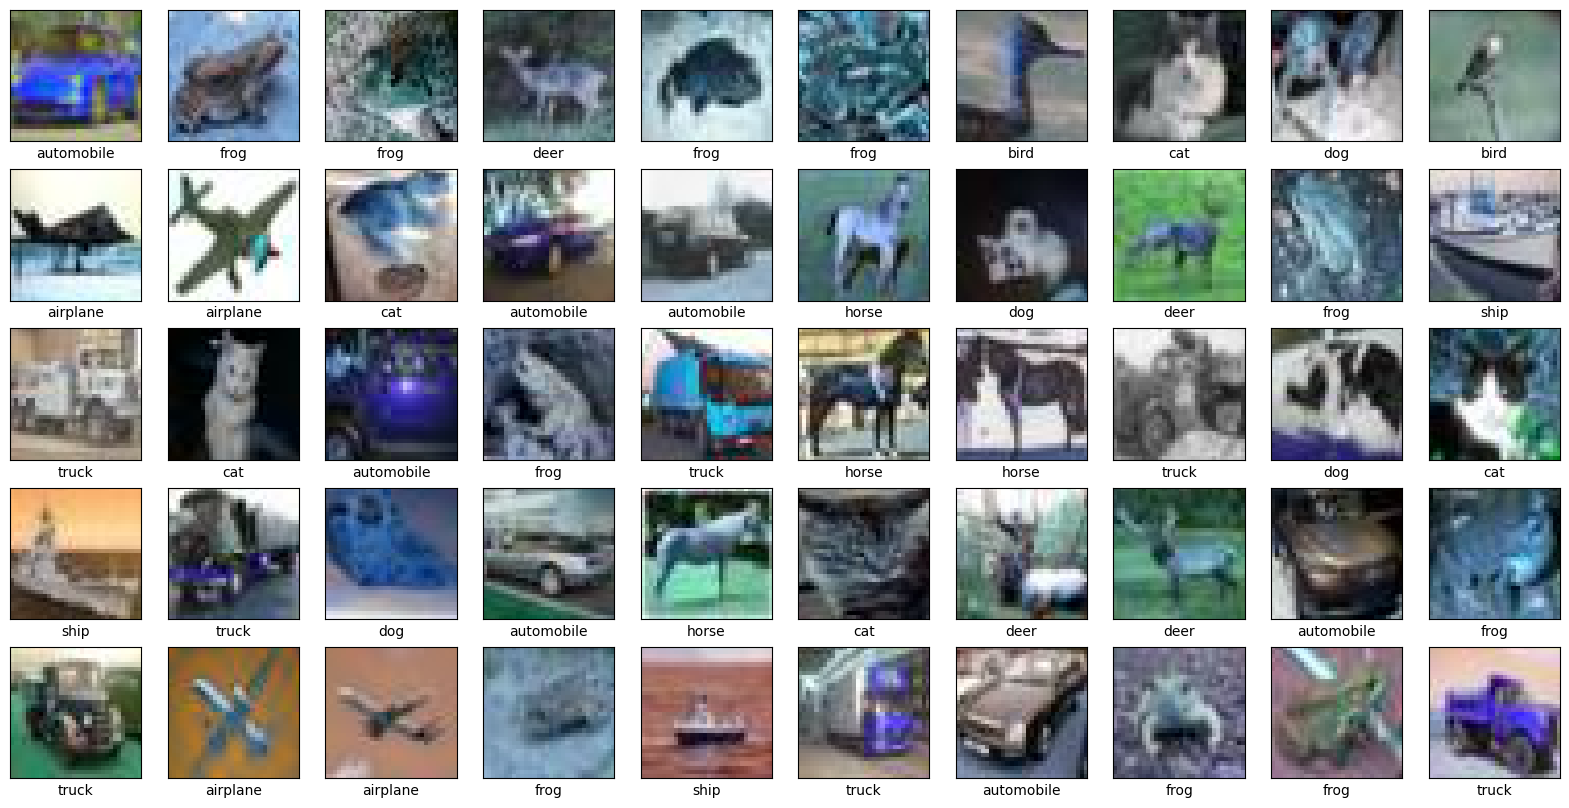

In [24]:
random.shuffle(train_data)
plt.figure(figsize=(20, 10))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(train_data[i]["image"])
    plt.xlabel(catagories[train_data[i]["class"]])
    plt.xticks([])
    plt.yticks([])
    if i == 50:
        break
plt.show()


In [25]:
# folding data
f0 = train_data[0:1000]
f1 = train_data[1000:2000]
f2 = train_data[2000:3000]
f3 = train_data[3000:4000]
f4 = train_data[4000:5000]


def train_test_split(X, y, test_size=0.2):
    X_train = X[: int(len(X) * (1 - test_size))]
    X_test = X[int(len(X) * (1 - test_size)) :]
    y_train = y[: int(len(y) * (1 - test_size))]
    y_test = y[int(len(y) * (1 - test_size)) :]
    return X_train, X_test, y_train, y_test

In [26]:
class KNeighborClassifer:
    k = None

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def accuracy(self, y_actual, y_pred):
        return np.sum(y_actual == y_pred) / len(y_actual)

    def predict(self, X_test, l_func="l2"):
        y_predtion = []
        i = 0
        for x in tqdm(X_test):
            distances = []
            for i in range(len(self.X)):
                if l_func == "l2":
                    distance = np.sqrt(np.sum((x - self.X[i]) ** 2))
                    distances.append({"distance": distance, "class": self.y[i]})
                elif l_func == "l1":
                    distance = np.sum(np.abs(x - self.X[i]))
                    distances.append({"distance": distance, "class": self.y[i]})
            distances.sort(key=lambda x: x["distance"])
            k_nearest = distances[: self.k]
            k_nearest_classes = [x["class"] for x in k_nearest]
            y_predtion.append(max(set(k_nearest_classes), key=k_nearest_classes.count))
        return y_predtion


In [27]:
X = np.array([i["image"] for i in train_data[:5000]])
y = np.array([i["class"] for i in train_data[:5000]])

l1_accuracies = {}
l2_accuracies = {}

k_neighbors = np.arange(1, 20)

for k in tqdm(k_neighbors):
    knn = KNeighborClassifer(k)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    knn.fit(X_train, y_train)

    y_pred_l1 = knn.predict(X_test, l_func="l1")
    y_pred_l2 = knn.predict(X_test, l_func="l2")

    l1_accuracies[k] = knn.accuracy(y_test, y_pred_l1)
    l2_accuracies[k] = knn.accuracy(y_test, y_pred_l2)

    print(
        f"for k = {k} l1 accuracy is {l1_accuracies[k]} and l2 accuracy is {l2_accuracies[k]}"
    )

  5%|▌         | 1/19 [00:36<11:01, 36.75s/it]

for k = 1 l1 accuracy is 0.208 and l2 accuracy is 0.2


 11%|█         | 2/19 [01:13<10:21, 36.57s/it]

for k = 2 l1 accuracy is 0.207 and l2 accuracy is 0.201


 16%|█▌        | 3/19 [01:49<09:45, 36.59s/it]

for k = 3 l1 accuracy is 0.212 and l2 accuracy is 0.197


 21%|██        | 4/19 [02:26<09:08, 36.60s/it]

for k = 4 l1 accuracy is 0.215 and l2 accuracy is 0.192


 26%|██▋       | 5/19 [03:03<08:32, 36.60s/it]

for k = 5 l1 accuracy is 0.234 and l2 accuracy is 0.197


 32%|███▏      | 6/19 [03:39<07:56, 36.64s/it]

for k = 6 l1 accuracy is 0.233 and l2 accuracy is 0.206


 37%|███▋      | 7/19 [04:16<07:19, 36.64s/it]

for k = 7 l1 accuracy is 0.236 and l2 accuracy is 0.197


 42%|████▏     | 8/19 [04:52<06:42, 36.62s/it]

for k = 8 l1 accuracy is 0.23 and l2 accuracy is 0.211


 47%|████▋     | 9/19 [05:29<06:06, 36.64s/it]

for k = 9 l1 accuracy is 0.232 and l2 accuracy is 0.203


 53%|█████▎    | 10/19 [06:06<05:29, 36.62s/it]

for k = 10 l1 accuracy is 0.232 and l2 accuracy is 0.197


 58%|█████▊    | 11/19 [06:43<04:53, 36.73s/it]

for k = 11 l1 accuracy is 0.225 and l2 accuracy is 0.202


 63%|██████▎   | 12/19 [07:20<04:17, 36.81s/it]

for k = 12 l1 accuracy is 0.227 and l2 accuracy is 0.199


 68%|██████▊   | 13/19 [07:56<03:40, 36.76s/it]

for k = 13 l1 accuracy is 0.233 and l2 accuracy is 0.201


 74%|███████▎  | 14/19 [08:33<03:03, 36.76s/it]

for k = 14 l1 accuracy is 0.238 and l2 accuracy is 0.2


 79%|███████▉  | 15/19 [09:10<02:26, 36.74s/it]

for k = 15 l1 accuracy is 0.231 and l2 accuracy is 0.202


 84%|████████▍ | 16/19 [09:46<01:50, 36.72s/it]

for k = 16 l1 accuracy is 0.228 and l2 accuracy is 0.212


 89%|████████▉ | 17/19 [10:23<01:13, 36.70s/it]

for k = 17 l1 accuracy is 0.228 and l2 accuracy is 0.209


 95%|█████████▍| 18/19 [11:00<00:36, 36.71s/it]

for k = 18 l1 accuracy is 0.226 and l2 accuracy is 0.198


100%|██████████| 19/19 [11:37<00:00, 36.69s/it]

for k = 19 l1 accuracy is 0.226 and l2 accuracy is 0.207


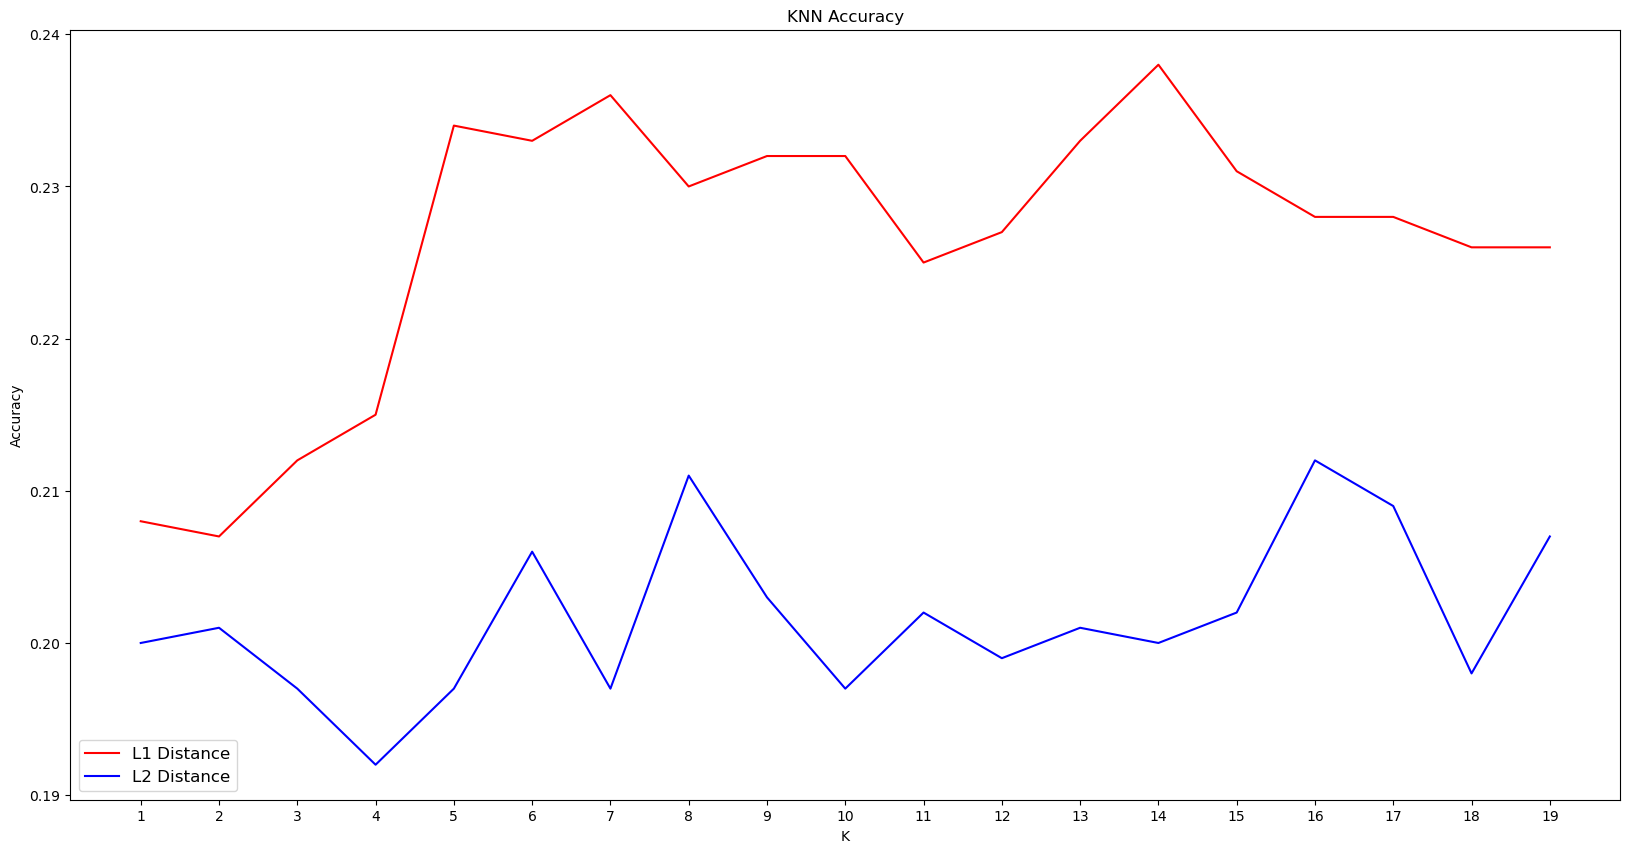

In [28]:
plt.figure(figsize=(20, 10))
plt.title("KNN Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(k_neighbors, list(l1_accuracies.values()), label="L1 Distance", color="red")
plt.plot(k_neighbors, list(l2_accuracies.values()), label="L2 Distance", color="blue")
plt.xticks(k_neighbors)
plt.legend(["L1 Distance", "L2 Distance"], loc="lower left", fontsize=12)
plt.show()

In [29]:
def best_accuracy(accuracies):
    best_k = max(accuracies, key=accuracies.get)
    best_accuracy = accuracies[best_k]
    return best_k, best_accuracy


best_k_l1, best_accuracy_l1 = best_accuracy(l1_accuracies)
best_k_l2, best_accuracy_l2 = best_accuracy(l2_accuracies)

print(f"Best K for L1 Distance is {best_k_l1} with accuracy {best_accuracy_l1}")

Best K for L1 Distance is 14 with accuracy 0.238
